# TITANIC SURVIVAL PREDICTION MODEL

### Loading data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('train.xls')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Preprocessing data

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
num_cols=['Age']
df['Age']= imputer.fit_transform(df[num_cols])

In [24]:
df=df.dropna(subset=['Embarked'])
df=df.drop(['Name' ,'Ticket','Cabin'], axis=1)

In [25]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [26]:
df= pd.get_dummies(df, columns=['Sex'], prefix='Sex')

In [27]:
df= pd.get_dummies(df, columns=['Embarked'], prefix='Location_Embarked')

In [28]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Location_Embarked_C,Location_Embarked_Q,Location_Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


## Training and Evaluating

Logistic Regression, KNeighbors, Gaussian, Random Forest Classifier and XG Boost comparison

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

X = df.drop(columns=["PassengerId", "Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

lr = LogisticRegression(random_state=42, max_iter=500)
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
xg = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
kn = KNeighborsClassifier()
nb = GaussianNB()

lr_param_grid = {}

rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5]
}

xg_param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.1, 0.2]
}

kn_param_grid = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance']
}

nb_param_grid = {}

models = {
    "LogisticRegression": {"model": lr, "params": lr_param_grid},
    "RandomForest": {"model": rf, "params": rf_param_grid},
    "XGBoost": {"model": xg, "params": xg_param_grid},
    "KNeighbors": {"model": kn, "params": kn_param_grid},
    "NaiveBayes": {"model": nb, "params": nb_param_grid},
}



In [30]:
results = []
best_accuracy = 0
best_model_name = None
best_model_pipeline = None

for name, model_info in models.items():
    print(f"\nTraining {name}")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model_info["model"])
    ])

    param_grid = model_info["params"] if model_info["params"] else {}

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    test_score = grid_search.score(X_test, y_test)

    results.append({
        "model": name,
        "best_params": grid_search.best_params_,
        "best_cv_score": grid_search.best_score_,
        "test_score": test_score
    })

    if test_score > best_accuracy:
        best_accuracy = test_score
        best_model_name = name
        best_model_pipeline = grid_search.best_estimator_

results_df = pd.DataFrame(results)


Training LogisticRegression

Training RandomForest

Training XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:45:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training KNeighbors

Training NaiveBayes


In [34]:
results_df

,model,best_params,best_cv_score,test_score
0,LogisticRegression,{},0.789057,0.808989
1,RandomForest,"{'model__max_depth': None, 'model__min_samples...",0.811563,0.814607
2,XGBoost,"{'model__learning_rate': 0.2, 'model__max_dept...",0.821403,0.808989
3,KNeighbors,"{'model__n_neighbors': 7, 'model__weights': 'u...",0.811504,0.786517
4,NaiveBayes,{},0.786250,0.814607


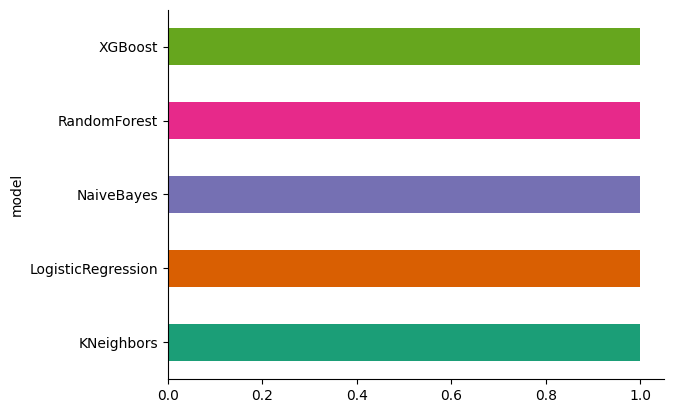

In [35]:

results_df.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
X= df.drop(columns=["PassengerId", "Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,validation_split=0.2)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(accuracy)

predictions = (model.predict(X_test_scaled) > 0.5).astype("int")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.2941 - loss: 0.7406 - val_accuracy: 0.6014 - val_loss: 0.6875
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5847 - loss: 0.6978 - val_accuracy: 0.6853 - val_loss: 0.6691
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5753 - loss: 0.6983 - val_accuracy: 0.6923 - val_loss: 0.6579
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6487 - loss: 0.6720 - val_accuracy: 0.6993 - val_loss: 0.6474
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6633 - loss: 0.6600 - val_accuracy: 0.7133 - val_loss: 0.6380
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6406 - loss: 0.6515 - val_accuracy: 0.7203 - val_loss: 0.6292
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6493 - loss: 0.6442 - val_accuracy: 0.7063 - val_loss: 0.6215
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6648 - loss: 0.6324 - val_accuracy: 0.7413 - val_l

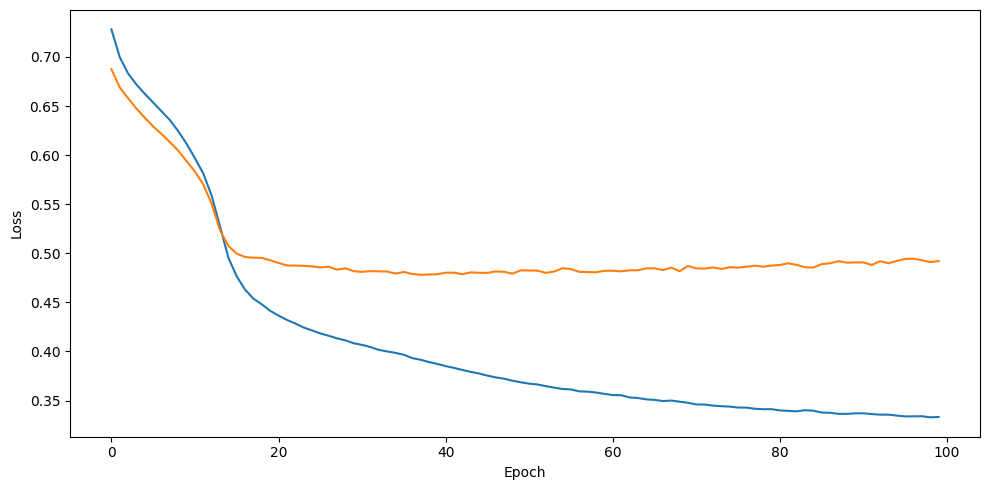

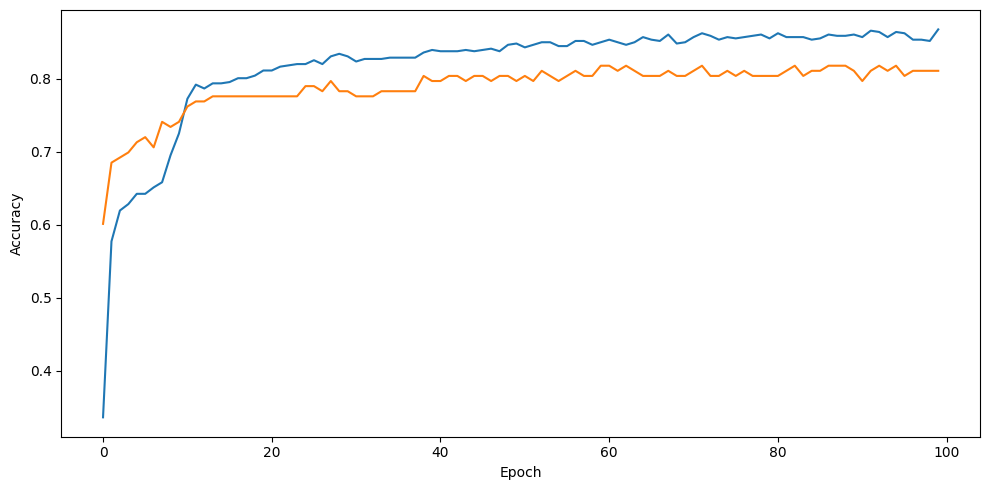

In [38]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()